# Working with Time Series Data

Financial time series data is one of the most important types of data in finance.  This is data indexed by date and/or time such as stock prices and exchange rates over time.

The major tool to work with time series data using Python in **pandas**.  Wes McKinney, the original and main author of pandas, starting developing the library when working as an analyst at AQR Capital Management, a large hedge fund.  As a result, it is safe to say that pandas has been designed from the ground up to work with financial time series data.

This notebook covers the basics of working with time series data.  It was written using the 3.7.3 version of Python.

### Importing the Necessary Packages

The first step in working with time series data is loading the necessary software packages, especially the pandas package.

In [1]:
# Import the data handling packages
import pandas as pd
import numpy as np

In [2]:
# Import the visualization packages
import matplotlib.pyplot as plt

# Ensure the visualizations will work within this notebook
%matplotlib inline

In [3]:
# Import a warnings package to ignore/suppress warnings
import warnings
warnings.filterwarnings("ignore")

### Loading the Data

Once the appropriate packages have been loaded, the next step is to load the data.  In this case, we will be loading a CSV file that contains some price information for Apple, the S&P 500, and others.

Specifically, the data within this file are from the Thomson Reuters (TR) Eikon Data API.  In the TR world, symbols for financial instruments are called Reuters Instrument Codes (RICs).  Knowing this, here is the meaning of each of the columns that appear within the data:
* AAPL.O is Apple stock
* MSFT.O is Microsoft stock
* INTC.O is Intel stock
* AMZN.O is Amazon stock
* GS.N is Goldman Sachs stock
* SPY is SPDR S&P 500 ETF Truse
* .SPX is S&P 500 Index
* .VIX is VIX Volatility Index
* EUR= is EUR/USD Exchange Rate
* XAU= is gold price
* GDX is VanEck Vectors Gold Miners ETF
* GLD is SPDR Gold Trust

In [4]:
# Create an object (variable) to store the name of the data file
filename = "TimeSeries.csv"

# Load the information from the data file into an object called data
# Use the first column as the row index (the row labels)
# Use the parse_dates keyword to indicate that the row index should be of type datetime (needed for time series)
data = pd.read_csv(filename, index_col=0, parse_dates=True)

In [5]:
# Display the first several rows of the DataFrame that contains the price information (named "data")
data.head(10)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-04,30.572827,30.950,20.880,133.900,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.870,134.690,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.800,132.250,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.600,130.000,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
2010-01-08,30.282827,30.660,20.830,133.520,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37
2010-01-11,30.015684,30.270,20.950,130.308,171.56,114.73,1146.98,17.55,1.4513,1152.60,50.17,112.85
2010-01-12,29.674256,30.070,20.608,127.350,167.82,113.66,1136.22,18.25,1.4494,1127.30,48.35,110.49
2010-01-13,30.092827,30.350,20.960,129.110,169.07,114.62,1145.68,17.85,1.4510,1138.40,48.86,111.54


In [6]:
# Display information about the "data" DataFrame 
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 12 columns):
AAPL.O    2138 non-null float64
MSFT.O    2138 non-null float64
INTC.O    2138 non-null float64
AMZN.O    2138 non-null float64
GS.N      2138 non-null float64
SPY       2138 non-null float64
.SPX      2138 non-null float64
.VIX      2138 non-null float64
EUR=      2216 non-null float64
XAU=      2211 non-null float64
GDX       2138 non-null float64
GLD       2138 non-null float64
dtypes: float64(12)
memory usage: 225.1 KB


From loading the data, we can see that there are 12 variables (columns) within the data.  Each of these columns contains numeric (float64) data.  In addition, we can see that the index (row labels) are Datetime data type and range from 1/1/2010 to 6/29/2018.

###  Visualizing and Exploring the Data

Once the data are loaded, a financial analyst will take a first look at the data using visualizations as well as some other statistics.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000232408B8DA0>,
      dtype=object)

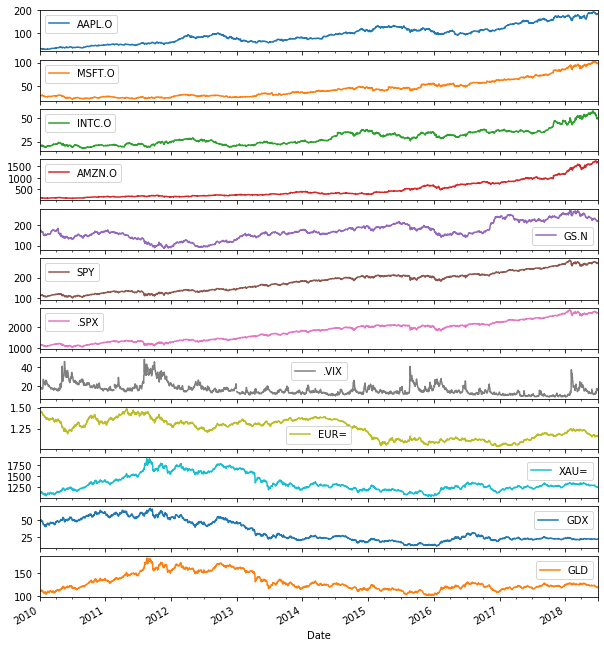

In [7]:
# Plot each column of data in its own subplot and increases the overall figure size to
# ensure all the plots can be seen (uses a "shorthand" method for doing plotting)
data.plot(figsize=(10, 12), subplots=True)

The next step the financial analyst might take is to have a look at the different summary statistics for the dataset to get a "feeling" for the data.
* Using the **describe** method allows the count of values, mean, standard deviation, minimum, maximum, and quartiles to be calculated for all columns using a single command.
* The **aggregate** method can be used to select specific summary statistics that should be calculated for all columns.
* Either of these methods can be combined with the **round** method, which is used to round the values to a specific number of decimal places.

In [8]:
# Calculate the summary statistics for the data contained within the data DataFrame
data.describe().round(2)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
count,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2138.00,2216.00,2211.00,2138.00,2138.00
mean,93.46,44.56,29.36,480.46,170.22,180.32,1802.71,17.03,1.25,1349.01,33.57,130.09
std,40.55,19.53,8.17,372.31,42.48,48.19,483.34,5.88,0.11,188.75,15.17,18.78
min,27.44,23.01,17.66,108.61,87.70,102.20,1022.58,9.14,1.04,1051.36,12.47,100.50
25%,60.29,28.57,22.51,213.60,146.61,133.99,1338.57,13.07,1.13,1221.53,22.14,117.40
50%,90.55,39.66,27.33,322.06,164.43,186.32,1863.08,15.58,1.27,1292.61,25.62,124.00
75%,117.24,54.37,34.71,698.85,192.13,210.99,2108.94,19.07,1.35,1428.24,48.34,139.00
max,193.98,102.49,57.08,1750.08,273.38,286.58,2872.87,48.00,1.48,1898.99,66.63,184.59


In [9]:
# Calculate specific summary statistics for each column within the DataFrame
data.aggregate([min, np.mean, np.std, np.median, max]).round(2)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
min,27.44,23.01,17.66,108.61,87.70,102.20,1022.58,9.14,1.04,1051.36,12.47,100.50
mean,93.46,44.56,29.36,480.46,170.22,180.32,1802.71,17.03,1.25,1349.01,33.57,130.09
std,40.55,19.53,8.17,372.31,42.48,48.19,483.34,5.88,0.11,188.75,15.17,18.78
median,90.55,39.66,27.33,322.06,164.43,186.32,1863.08,15.58,1.27,1292.61,25.62,124.00
max,193.98,102.49,57.08,1750.08,273.38,286.58,2872.87,48.00,1.48,1898.99,66.63,184.59


Statistical analysis methods are often based on changes over time and not the absolute values themselves.  There are multiple options to calculate the changes in a time series over time, including absolute differences, percentage changes, and logarithmic (log) returns).

For absolute differences, the **diff** method is used.  This method takes the previous value and the current value, subtracts them, and then takes the absolute value of the difference.

In [10]:
# Calculate the absolute difference between each row of data in the data DataFrame
data.diff().head(10)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0088,23.65,NaN,NaN
2010-01-05,0.052857,0.010,-0.010,0.790,3.06,0.30,3.53,-0.69,-0.0043,-1.35,0.46,-0.10
2010-01-06,-0.487142,-0.190,-0.070,-2.440,-1.88,0.08,0.62,-0.19,0.0044,19.85,1.17,1.81
2010-01-07,-0.055714,-0.318,-0.200,-2.250,3.41,0.48,4.55,-0.10,-0.0094,-6.60,-0.24,-0.69
2010-01-08,0.200000,0.208,0.230,3.520,-3.36,0.38,3.29,-0.93,0.0094,4.20,0.74,0.55
2010-01-11,-0.267143,-0.390,0.120,-3.212,-2.75,0.16,2.00,-0.58,0.0101,16.50,0.33,1.48
2010-01-12,-0.341428,-0.200,-0.342,-2.958,-3.74,-1.07,-10.76,0.70,-0.0019,-25.30,-1.82,-2.36
2010-01-13,0.418571,0.280,0.352,1.760,1.25,0.96,9.46,-0.40,0.0016,11.10,0.51,1.05


In [11]:
# Calculate the average absolute difference for each column within the data DataFrame
data.diff().mean().round(4)

AAPL.O    0.0647
MSFT.O    0.0312
INTC.O    0.0135
AMZN.O    0.7066
GS.N      0.0282
SPY       0.0721
.SPX      0.7327
.VIX     -0.0196
EUR=     -0.0001
XAU=      0.0419
GDX      -0.0151
GLD      -0.0035
dtype: float64

From a statistics point of view, absolute changes are not optimal because they are dependent on the scale of the time series data.  As a result, percentage changes are usually preferred.  The **pct_change** method can be used for this purpose.  This method takes the current value, divides it by the previous value, and then subtracts 1 from the result.

In [12]:
# Calculate the percentage change between each row of data in the data DataFrame
data.pct_change().round(4).head(10)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0061,0.0216,NaN,NaN
2010-01-05,0.0017,0.0003,-0.0005,0.0059,0.0177,0.0026,0.0031,-0.0344,-0.0030,-0.0012,0.0096,-0.0009
2010-01-06,-0.0159,-0.0061,-0.0034,-0.0181,-0.0107,0.0007,0.0005,-0.0098,0.0031,0.0177,0.0243,0.0165
2010-01-07,-0.0018,-0.0103,-0.0096,-0.0170,0.0196,0.0042,0.0040,-0.0052,-0.0065,-0.0058,-0.0049,-0.0062
2010-01-08,0.0066,0.0068,0.0112,0.0271,-0.0189,0.0033,0.0029,-0.0488,0.0066,0.0037,0.0151,0.0050
2010-01-11,-0.0088,-0.0127,0.0058,-0.0241,-0.0158,0.0014,0.0017,-0.0320,0.0070,0.0145,0.0066,0.0133
2010-01-12,-0.0114,-0.0066,-0.0163,-0.0227,-0.0218,-0.0093,-0.0094,0.0399,-0.0013,-0.0220,-0.0363,-0.0209
2010-01-13,0.0141,0.0093,0.0171,0.0138,0.0074,0.0084,0.0083,-0.0219,0.0011,0.0098,0.0105,0.0095


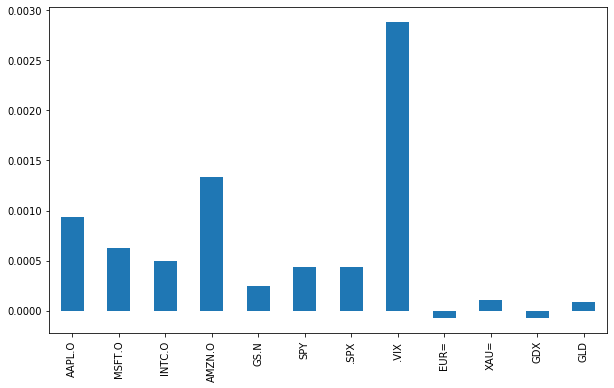

In [13]:
# Visualize the mean percentage change for each column of data in the data DataFrame (use "shorthand" method)
data.pct_change().mean().plot(kind="bar", figsize=(10, 6))

An alternative to percentage returns is to use log returns.  In some scenarios, these returns are easier to handle and may be preferred in a financial context.  To calculate log returns, the **np.log** method and the **shift** method are used.

In [14]:
# Calculate the log of the data within the data DataFrame
# Store the information in an object called log_returns
log_returns = np.log(data/data.shift(1))
log_returns.round(4).head(10)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0061,0.0213,NaN,NaN
2010-01-05,0.0017,0.0003,-0.0005,0.0059,0.0175,0.0026,0.0031,-0.0350,-0.0030,-0.0012,0.0096,-0.0009
2010-01-06,-0.0160,-0.0062,-0.0034,-0.0183,-0.0107,0.0007,0.0005,-0.0099,0.0031,0.0176,0.0240,0.0164
2010-01-07,-0.0019,-0.0104,-0.0097,-0.0172,0.0194,0.0042,0.0040,-0.0052,-0.0065,-0.0058,-0.0049,-0.0062
2010-01-08,0.0066,0.0068,0.0111,0.0267,-0.0191,0.0033,0.0029,-0.0500,0.0065,0.0037,0.0150,0.0050
2010-01-11,-0.0089,-0.0128,0.0057,-0.0244,-0.0159,0.0014,0.0017,-0.0325,0.0070,0.0144,0.0066,0.0132
2010-01-12,-0.0114,-0.0066,-0.0165,-0.0230,-0.0220,-0.0094,-0.0094,0.0391,-0.0013,-0.0222,-0.0370,-0.0211
2010-01-13,0.0140,0.0093,0.0169,0.0137,0.0074,0.0084,0.0083,-0.0222,0.0011,0.0098,0.0105,0.0095


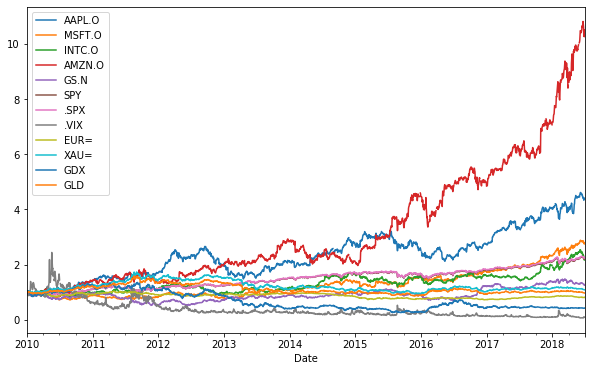

In [15]:
# Visualize the cumulative log returns over time (uses "shorthand" method)
log_returns.cumsum().apply(np.exp).plot(figsize=(10,6))

### Frequency and Resampling

One of the key considerations when using time series data is the frequency with which the data are collected.  Technology allows us to gather data very frequently such as each second, each minute, etc.  The higher the frequency of data collection, though, the more noise that may be present within the data.  As a result, we need to balance the frequency of the data with the amount of noise that can be tolerated in our analysis.

Resampling is a process of modifying the frequency of the data, which is an important operation when working with financial time series data.  Usually, this takes the form of downsampling.  Downsampling reduces the frequency of the data, such as changing one-second intervals to one-minute intervals or changing daily observations to weekly or monthly observations.  The **resample** method can be used to perform this operation.

For our dataset, the current frequency is daily (whenever the stock market is open for business).  We will change the frequency to weekly and monthly using resampling.  For this example, we will use the last value in the interval (last value in the week or last value in the month) for the resample value.  In addition, the last resample method will show how to use the average value instead of the last value.

For more information about resampling and its options, refer to Using the Pandas "Resample" Function (https://towardsdatascience.com/using-the-pandas-resample-function-a231144194c4).

In [16]:
# Create a new DataFrame (called "weekly") that resamples the daily data to weekly values (last value in week)
# The rule keyword indicates the resampling "rule" (frequency) to use
# The label keyword indicates the date to use for labeling the new data point
# Left is the first date in the week; right is the last date in the week
# The last method indicates that the last value in the week should be used as the data point
weekly = data.resample(rule="1W", label="right").last()
weekly.head(10).round(4)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-10,30.2828,30.6600,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37
2010-01-17,29.4185,30.8600,20.80,127.14,165.21,113.64,1136.03,17.91,1.4382,1129.90,47.42,110.86
2010-01-24,28.2500,28.9600,19.91,121.43,154.12,109.21,1091.76,27.31,1.4137,1092.60,43.79,107.17
2010-01-31,27.4375,28.1800,19.40,125.41,148.72,107.39,1073.87,24.62,1.3862,1081.05,40.72,105.96
2010-02-07,27.9228,28.0200,19.47,117.39,154.16,106.66,1066.19,26.11,1.3662,1064.95,42.41,104.68
2010-02-14,28.6257,27.9300,20.43,119.66,153.93,108.04,1075.51,22.73,1.3615,1092.40,43.94,107.04
2010-02-21,28.8100,28.7700,20.82,117.52,156.18,111.14,1109.17,20.02,1.3615,1118.45,44.57,109.47
2010-02-28,29.2314,28.6700,20.53,118.40,156.35,110.74,1104.49,19.50,1.3625,1116.10,43.89,109.43


In [17]:
# Create a new DataFrame (called "monthly") that resamples the daily data to monthly values (last value in month)
# The rule keyword indicates the resampling "rule" (frequency) to use
# The label keyword indicates the date to use for labeling the new data point
# Left is the first date in the month; right is the last date in the month
# The last method indicates that the last value in the month should be used as the data point
monthly = data.resample(rule="1M", label="right").last()
monthly.head(10).round(4)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-31,27.4375,28.1800,19.400,125.41,148.72,107.3900,1073.87,24.62,1.3862,1081.05,40.720,105.960
2010-02-28,29.2314,28.6700,20.530,118.40,156.35,110.7400,1104.49,19.50,1.3625,1116.10,43.890,109.430
2010-03-31,33.5714,29.2875,22.290,135.77,170.63,117.0000,1169.43,17.59,1.3510,1112.80,44.410,108.950
2010-04-30,37.2985,30.5350,22.840,137.10,145.20,118.8125,1186.69,22.05,1.3295,1178.25,50.510,115.360
2010-05-31,36.6971,25.8000,21.420,125.46,144.26,109.3690,1089.41,32.07,1.2305,1215.71,49.860,118.881
2010-06-30,35.9328,23.0100,19.450,109.26,131.27,103.2200,1030.71,34.54,1.2234,1241.35,51.960,121.680
2010-07-31,36.7500,25.8100,20.600,117.89,150.82,110.2700,1101.60,23.50,1.3045,1180.40,48.220,115.490
2010-08-31,34.7285,23.4650,17.665,124.83,136.94,105.3100,1049.33,26.05,1.2685,1245.65,53.610,122.080
2010-09-30,40.5357,24.4900,19.200,157.06,144.58,114.1300,1141.20,23.70,1.3630,1308.50,55.930,127.910


In [18]:
# Create a new DataFrame (called "monthly_avg") that resamples the daily data to monthly values 
# (average value in month)
# The rule keyword indicates the resampling "rule" (frequency) to use
# The label keyword indicates the date to use for labeling the new data point
# Left is the first date in the month; right is the last date in the month
# The mean method indicates that the average value in the month should be used as the data point
monthly_avg = data.resample(rule="1M", label="right").mean()
monthly_avg.head(10).round(4)

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-31,29.6736,30.1467,20.6073,127.4231,164.5611,112.4074,1123.5816,20.6432,1.4272,1116.6762,46.3421,109.4725
2010-02-28,28.3993,28.3563,20.1594,118.0211,155.1811,109.1532,1089.1600,22.5400,1.3683,1098.4300,43.1695,107.5974
2010-03-31,31.9158,29.2585,21.6233,130.8973,171.0383,115.4649,1152.0487,17.7674,1.3572,1113.6739,45.0903,109.0747
2010-04-30,35.8783,30.5226,23.2557,141.0700,166.8781,119.8455,1197.3162,17.4243,1.3425,1148.6486,47.8995,112.6600
2010-05-31,35.9230,28.1169,21.7635,127.6062,142.9520,112.7902,1125.0635,31.9295,1.2533,1205.2905,50.1753,117.9892
2010-06-30,37.3065,25.4204,20.7797,121.6669,137.3923,108.6443,1083.3609,29.9164,1.2208,1233.2309,51.4520,120.7008
2010-07-31,36.4213,25.0743,20.8621,117.5190,142.5410,108.0928,1079.8033,25.5652,1.2800,1192.2809,49.0176,116.5720
2010-08-31,35.9033,24.7066,19.3966,126.3727,148.2209,109.0524,1087.2823,24.7459,1.2895,1216.3182,50.8491,119.0714
2010-09-30,39.1216,24.5943,18.7286,147.6648,147.8729,112.4633,1122.0819,22.5176,1.3090,1271.6841,54.7281,124.4665


### Using Naive Forecasting

Once we have resampled the data appropriately, we can use this information to create forecasts based on the data available.  In our example, the original data was captured using a daily frequency.  Although we did complete some resampling of this dataset, we will use the original daily frequency when working with forecasts.

The first forecasting method we will attempt is naive forecasting.  In this approach, we assume that the next expected data point is equal to the last observed data point.  We can also adjust this value for drift and seasonality.

To obtain a naive forecast, we will create a new DataFrame that contains information for only one column (to make forecasting easier).  In addition, we will add one row to the end of the DataFrame as a placeholder for the forecast value.  Finally, we will use the **shift** method to shift the values by 1 and place this "forecast" in a new column in the DataFrame.

In [19]:
# Create an object (variable) named "ticker" that contains the ID for the column of price information we want
# to forecast
ticker = "AAPL.O"

In [20]:
# Create a DataFrame called "aapl_data" that contains the stock price information for Apple
# Remove any rows that are blank (contain NA)
aapl_data = pd.DataFrame(data[ticker]).dropna()

In [21]:
# Review the last several rows in the aapl_data DataFrame
aapl_data.tail()

,AAPL.O
Date,
2018-06-25,182.17
2018-06-26,184.43
2018-06-27,184.16
2018-06-28,185.50
2018-06-29,185.11


In [22]:
# Determine the next date that should appear within the appl_data DataFrame
# Take the last date and add 1 day to the last date
last_date = aapl_data.iloc[[-1]].index + pd.Timedelta(days=1)
last_date

DatetimeIndex(['2018-06-30'], dtype='datetime64[ns]', name='Date', freq=None)

In [23]:
# Add a new row to the aapl_data DataFrame that has the "new last date" as the row index (label)
aapl_data = aapl_data.append(pd.DataFrame(index=last_date))

# Review the last several rows in the aapl_data DataFrame
aapl_data.tail()

,AAPL.O
Date,
2018-06-26,184.43
2018-06-27,184.16
2018-06-28,185.50
2018-06-29,185.11
2018-06-30,NaN


In [24]:
# Shift the values down one row to create the naive forecast
aapl_data ["naive"] = aapl_data[ticker].shift(periods=1, axis="rows")

# Review the last several rows in the aapl_data DataFrame
aapl_data.tail()

,AAPL.O,naive
Date,,
2018-06-26,184.43,182.17
2018-06-27,184.16,184.43
2018-06-28,185.50,184.16
2018-06-29,185.11,185.50
2018-06-30,NaN,185.11


To add drift or seasonality to the naive forecast is fairly straightforward.  Once the drift or seasonality value is known, this value can be used to adjust the forecasted value.  Below is an example of a 2% drift being used to calculate a new naive forecast.  A similar approach could be used to modify the naive forecast based on functionality.

In [25]:
# Create an object (variable) called "drift" to hold the appropriate drift value
drift = 1 + 0.02

# Shift the values down one row to create the naive forecast
aapl_data ["naive_drift"] = aapl_data[ticker].shift(periods=1, axis="rows") * drift

# Review the last several rows in the aapl_data DataFrame
aapl_data.tail()

,AAPL.O,naive,naive_drift
Date,,,
2018-06-26,184.43,182.17,185.8134
2018-06-27,184.16,184.43,188.1186
2018-06-28,185.50,184.16,187.8432
2018-06-29,185.11,185.50,189.2100
2018-06-30,NaN,185.11,188.8122


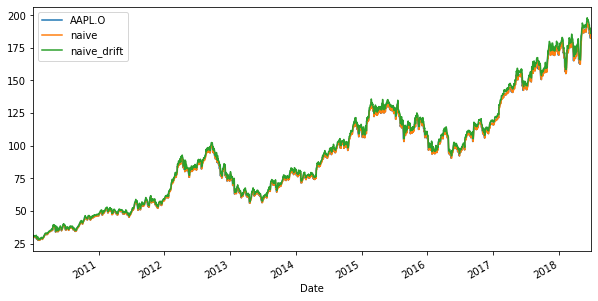

In [26]:
# Plot each column of data and increase the overall figure size to ensure all the plots can be seen 
# (uses a "shorthand" method for doing plotting)
aapl_data.plot(figsize=(10, 5))

### Using Moving Average (MA) Forecasting

Another approach is moving average forecasting, which is based on a rolling average.  Financial analysts often work with rolling statistics (often called financial indicators or financial studies).  Rolling statistics are a major tool in the so-called technical analysis of stocks, as compared to the fundamental analysis which focuses on financial reports and the strategic positions of the company whose stock is being analyzed.

A decades-old trading strategy based on technical analysis is using two simple moving averages (SMAs).  The idea is that the traders should go long on a stock (or financial instrument in general) when the shorter-term SMA is above the longer-term SMA and should go short when the opposite holds true.

Calculating a moving average is based on a window, also known as k.  k is the number of previous observations that are averaged together to get the forecasted value.  For example a window or k of 5 means the previous 5 observations would be averaged to obtain the forecasted value.

In our example, we will use a window of 10 (k=10) to calculate a rolling average for our Apple stock prices using the **rolling** method.  This method takes a window of values, calculates the average for these values, and then places the average at the position of the last value in the window.

In forecasting, though, the previous values are used to calculate the "next" value (the forecasted value).  As a result, whenever the **rolling** method is used, we need to follow this method with a shift to shift the values down by one row.

In [27]:
# Calculate a rolling mean (moving average) for the Apple stock information
# Use a window of 10 (k=10) for the rolling mean
aapl_data["MA_10"] = aapl_data[ticker].rolling(window=10).mean()

# Shift the values down one row
aapl_data ["MA_10"] = aapl_data["MA_10"].shift(periods=1, axis="rows")

# Review the last several rows in the aapl_data DataFrame
aapl_data.tail()

,AAPL.O,naive,naive_drift,MA_10
Date,,,,
2018-06-26,184.43,182.17,185.8134,187.610
2018-06-27,184.16,184.43,188.1186,186.825
2018-06-28,185.50,184.16,187.8432,186.171
2018-06-29,185.11,185.50,189.2100,185.641
2018-06-30,NaN,185.11,188.8122,185.268


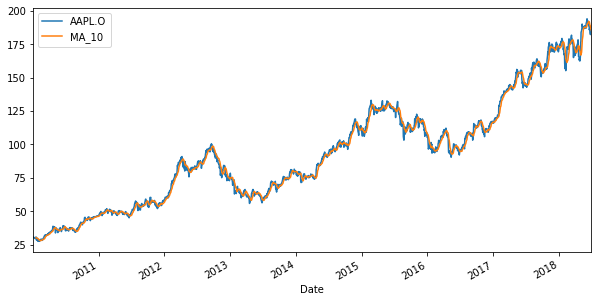

In [28]:
# Plot each column of data and increase the overall figure size to ensure all the plots can be seen 
# (uses a "shorthand" method for doing plotting)
aapl_data["AAPL.O"].plot(figsize=(10, 5))
aapl_data["MA_10"].plot(figsize=(10, 5))
plt.legend()

In general, the bigger the window, the "smoother" the time series forecast that results.  For example, we could increase the window to 50.  If we visualize this forecast, we can see that the line is "smoother" than the original data and the moving average forecast that uses a window of 10.

In [29]:
# Calculate a rolling mean (moving average) for the Apple stock information
# Use a window of 50 (k=50) for the rolling mean
aapl_data["MA_50"] = aapl_data[ticker].rolling(window=50).mean()

# Shift the values down one row
aapl_data ["MA_50"] = aapl_data["MA_50"].shift(periods=1, axis="rows")

# Review the last several rows in the aapl_data DataFrame
aapl_data.tail()

,AAPL.O,naive,naive_drift,MA_10,MA_50
Date,,,,,
2018-06-26,184.43,182.17,185.8134,187.610,183.1542
2018-06-27,184.16,184.43,188.1186,186.825,183.3264
2018-06-28,185.50,184.16,187.8432,186.171,183.4448
2018-06-29,185.11,185.50,189.2100,185.641,183.5980
2018-06-30,NaN,185.11,188.8122,185.268,183.8442


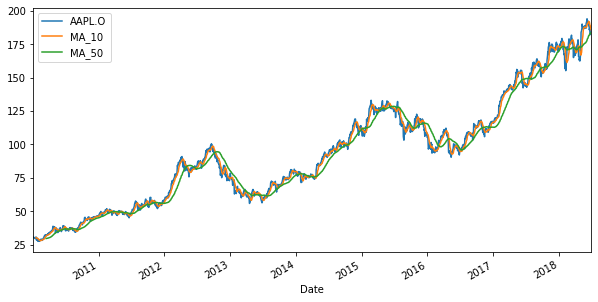

In [30]:
# Plot each column of data and increase the overall figure size to ensure all the plots can be seen 
# (uses a "shorthand" method for doing plotting)
aapl_data["AAPL.O"].plot(figsize=(10, 5))
aapl_data["MA_10"].plot(figsize=(10, 5))
aapl_data["MA_50"].plot(figsize=(10, 5))
plt.legend()

### Using Weighted Moving Average (WMA) Forecasting

In some applications, the simple moving average forecast is too limited.  For example, it gives equal weight to each of the data values within the window.  Weighted moving average (WMA) and exponential moving average (EMA) are two approaches that address some of the limitations of a simple moving average.

A linearly weighted moving average, known as a weighted moving average, gives more weight to the most recent data value and gradually less the older a data value is.  For example, in a window of 10 (k=10), the data point for the 10th day would be multiplied by 10, the 9th day by 9, etc.  The total would then be divided by the sum of the weights.

While Python does not provide a method specifically for WMA calculations, we can use a method called **apply** to create and pass a customer function to a rolling window.  To calculate the WMA for a window of 10 (such as 10 days), we first create an array of weights (in this case, the weights are 1, 2, 3, etc. to 10).  Then, we compute the dot product of these weights and the data points and divide the sum of these values by the sum of the weights.  Below is the code used to create the WMA.

In [31]:
# Create an array that contains the weights for this weighted moving average
# In this example, we will use 1, 2, 3, ..., 10 as the weights, meaning day 10 will be multipled by 10,
# day 9 will be multipled by 9, etc.
# The array of weights to be used in this example will be called "weights"
weights = np.arange(1, 11)

# View the array of weights
weights

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [32]:
# Create a column in the DataFrame that contains Apple information (aapl_data) that contains the WMA
# Call the column "WMA_10"
# Create a window of 10 values and calculate the dot product of the values in this window and the array of weights
# Sum the dot product values and divide by the sum of the weights
aapl_data["WMA_10"] = aapl_data[ticker].rolling(window=10).apply(lambda prices: 
                                                                 np.dot(prices, weights)/weights.sum(), raw=True)

# Shift the values down one row
aapl_data["WMA_10"] = aapl_data["WMA_10"].shift(periods=1, axis="rows")

# Review the last several rows in the aapl_data DataFrame
aapl_data.tail()

,AAPL.O,naive,naive_drift,MA_10,MA_50,WMA_10
Date,,,,,,
2018-06-26,184.43,182.17,185.8134,187.610,183.1542,186.080727
2018-06-27,184.16,184.43,188.1186,186.825,183.3264,185.502545
2018-06-28,185.50,184.16,187.8432,186.171,183.4448,185.018000
2018-06-29,185.11,185.50,189.2100,185.641,183.5980,184.896000
2018-06-30,NaN,185.11,188.8122,185.268,183.8442,184.799455


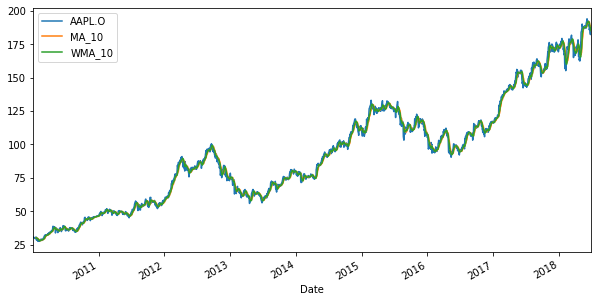

In [33]:
# Plot the original data, the moving average (k=10), and weighted moving average (k=10) values
# Increase the overall figure size to ensure all the plots can be seen 
# (uses a "shorthand" method for doing plotting)
aapl_data["AAPL.O"].plot(figsize=(10, 5))
aapl_data["MA_10"].plot(figsize=(10, 5))
aapl_data["WMA_10"].plot(figsize=(10, 5))
plt.legend()

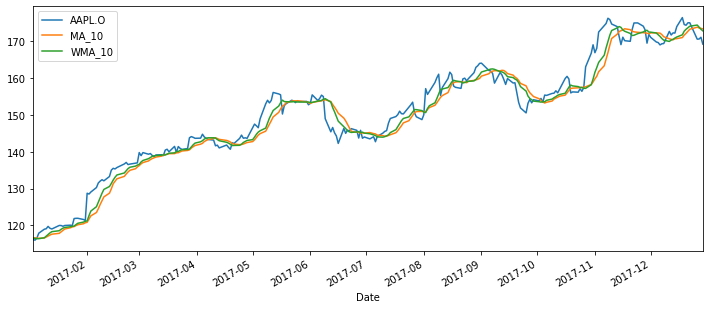

In [34]:
# Plot the original data, the moving average (k=10), and weighted moving average (k=10) values
# Zoom in on the last year
# Increase the overall figure size to ensure all the plots can be seen 
# (uses a "shorthand" method for doing plotting)
aapl_data["AAPL.O"].ix["2017-01-01":"2018-01-01"].plot(figsize=(12, 5))
aapl_data["MA_10"].ix["2017-01-01":"2018-01-01"].plot(figsize=(12, 5))
aapl_data["WMA_10"].ix["2017-01-01":"2018-01-01"].plot(figsize=(12, 5))
plt.legend()

### Using Exponential Moving Average (EMA) Forecasting

Similar to the weighted moving average, the exponential moving average (EMA) assigns a greater weight to the most recent data points.  While it assigns a lesser weight to past data, it is based on a recursive formula that includes in its calculation all the past data in our dataset.

The basic formula for calculating an EMA at time t is: $$EMA_{t} = \alpha DataPoint_{t} + (1 - \alpha)EMA_{t - 1}$$.

Alpha is a smoothing factor that is a positive number less than 1.  It is based on the number of datapoints (k) in our window and is calculated using the following formula:  $$ \alpha = \frac{2}{k + 1}$$

For example, if we want a 10-day EMA, the smoothing factor would be:  $$ \alpha = \frac{2}{10 + 1} = 0.1818$$

The Python pandas package does include an **ewm** method to calculate the EMA of any time series.  By default, this code includes calculations for the first k values within the dataset (the initial window).  Below is code showing an example of a 10-day EMA.

In general, calculations are not performed for this window.  As a result, we will create a separate DataFrame with just the initial Apple stock information, remove the first 10 values (set them to NaN values), use the ewm method, and then add the forecasted values to the original aapl_data DataFrame.

In [35]:
# Create a new DataFrame with just the original Apple stock data
# Call this new DataFrame mod_frame
mod_frame = aapl_data[ticker].copy()

In [36]:
# Set the first 10 values to NaN values
mod_frame.iloc[0:10] = np.nan

In [37]:
# View the first 15 rows in the modified Apple stock data DataFrame
mod_frame.head(15)

Date
2010-01-04          NaN
2010-01-05          NaN
2010-01-06          NaN
2010-01-07          NaN
2010-01-08          NaN
2010-01-11          NaN
2010-01-12          NaN
2010-01-13          NaN
2010-01-14          NaN
2010-01-15          NaN
2010-01-19    30.719969
2010-01-20    30.246398
2010-01-21    29.724542
2010-01-22    28.249972
2010-01-25    29.010685
Name: AAPL.O, dtype: float64

In [38]:
# Use the ewm method to calculate the EMA
# Set the span keyword to 10 indicating a 10-day EMA
# Set the adjust keywork to false so that the first n values (in our case, 10) are skipped.
# Calculate the mean using the mean method
mod_frame = mod_frame.ewm(span=10, adjust=False).mean()

In [39]:
# Review the first 15 rows of the modified DataFrame
mod_frame.head(15)

Date
2010-01-04          NaN
2010-01-05          NaN
2010-01-06          NaN
2010-01-07          NaN
2010-01-08          NaN
2010-01-11          NaN
2010-01-12          NaN
2010-01-13          NaN
2010-01-14          NaN
2010-01-15          NaN
2010-01-19    30.719969
2010-01-20    30.633865
2010-01-21    30.468534
2010-01-22    30.065159
2010-01-25    29.873436
Name: AAPL.O, dtype: float64

In [40]:
# Add the 10-day EMA forecast to the original Apple stock DataFrame (aapl_data)
aapl_data["EMA_10"] = mod_frame

In [41]:
# Review the first 15 rows in the aapl_data DataFrame
aapl_data.head(15)

,AAPL.O,naive,naive_drift,MA_10,MA_50,WMA_10,EMA_10
Date,,,,,,,
2010-01-04,30.572827,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,30.625684,30.572827,31.184283,NaN,NaN,NaN,NaN
2010-01-06,30.138541,30.625684,31.238197,NaN,NaN,NaN,NaN
2010-01-07,30.082827,30.138541,30.741312,NaN,NaN,NaN,NaN
2010-01-08,30.282827,30.082827,30.684484,NaN,NaN,NaN,NaN
2010-01-11,30.015684,30.282827,30.888483,NaN,NaN,NaN,NaN
2010-01-12,29.674256,30.015684,30.615998,NaN,NaN,NaN,NaN
2010-01-13,30.092827,29.674256,30.267741,NaN,NaN,NaN,NaN
2010-01-14,29.918542,30.092827,30.694684,NaN,NaN,NaN,NaN


In [42]:
# Review the last several rows in the aapl_data DataFrame
aapl_data.tail()

,AAPL.O,naive,naive_drift,MA_10,MA_50,WMA_10,EMA_10
Date,,,,,,,
2018-06-26,184.43,182.17,185.8134,187.610,183.1542,186.080727,186.276300
2018-06-27,184.16,184.43,188.1186,186.825,183.3264,185.502545,185.891518
2018-06-28,185.50,184.16,187.8432,186.171,183.4448,185.018000,185.820333
2018-06-29,185.11,185.50,189.2100,185.641,183.5980,184.896000,185.691182
2018-06-30,NaN,185.11,188.8122,185.268,183.8442,184.799455,185.691182


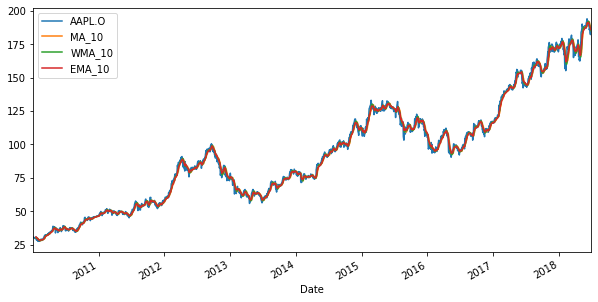

In [43]:
# Plot the original data, the moving average (k=10), WMA (k=10), and EMA (k=10) values
# Increase the overall figure size to ensure all the plots can be seen 
# (uses a "shorthand" method for doing plotting)
aapl_data["AAPL.O"].plot(figsize=(10, 5))
aapl_data["MA_10"].plot(figsize=(10, 5))
aapl_data["WMA_10"].plot(figsize=(10, 5))
aapl_data["EMA_10"].plot(figsize=(10, 5))
plt.legend()

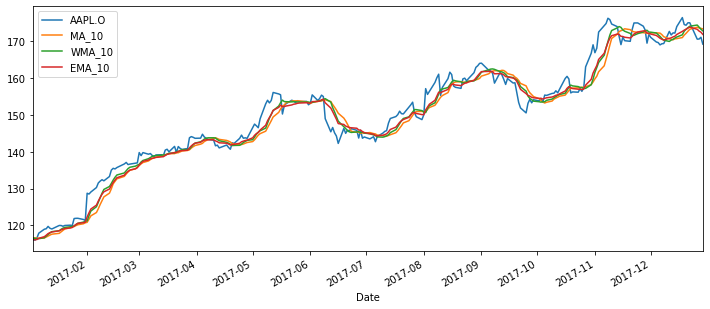

In [44]:
# Plot the original data, the moving average (k=10), WMA(k=10), and EMA (k=10) values
# Zoom in on the last year
# Increase the overall figure size to ensure all the plots can be seen 
# (uses a "shorthand" method for doing plotting)
aapl_data["AAPL.O"].ix["2017-01-01":"2018-01-01"].plot(figsize=(12, 5))
aapl_data["MA_10"].ix["2017-01-01":"2018-01-01"].plot(figsize=(12, 5))
aapl_data["WMA_10"].ix["2017-01-01":"2018-01-01"].plot(figsize=(12, 5))
aapl_data["EMA_10"].ix["2017-01-01":"2018-01-01"].plot(figsize=(12, 5))
plt.legend()

# References
> (c) 2019 Yves Hilpisch. Code included in _Python for Finance: Mastering Data-driven Finance_ (Second Edition). Yves Hilpisch. 2019.
>
> (c) 2019 Galit Shmueli, Peter C. Bruce, Peter Gedeck.  Code included in _Data Mining for Business Analytics: Concepts, Techniques, and Applications in Python_ (First Edition). Galit Shmueli, Peter C. Bruce, Peter Gedeck, and Nitin R. Patel. 2019.

# For Homework

Complete the following:
* Using the yahoofinance package or the fredapi package, obtain a dataset.
* Store the dataset in a DataFrame.
* Setup the DataFrame so that it has a datetime index.
* Calculate a naive forecast for the dataset and add that forecast to the original DataFrame.
* Calculate a simple moving average forecast (k=8) and add that forecast to the original DataFrame.
* Calculate a weighted moving average forecast (k=8) using 1, 2, 3, ..., 8 as the constants.  Add that forecast to the original DataFrame.
* Calculate a exponential moving average forecast (k=8) and add that forecast to the original dataset.
* Visualize the original data, the simple moving average, the weighted moving average, and the exponential moving average on the same plot.

For a challenge, create a few visualizations that zoom in to parts of the graph that includes the original data and the three forecasts.